In [1]:
# resources
import sys
sys.path.append("../../py")
from direct.problems import planet2planet
import pygmo as pg
import pygmo_plugins_nonfree as pg7
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# algorithm
uda = pg7.snopt7(True, "/usr/lib/libsnopt7_c.so")
uda.set_integer_option("Major iterations limit", 4000)
uda.set_integer_option("Iterations limit", 20000)
uda.set_numeric_option("Major optimality tolerance", 1e-3)
uda.set_numeric_option("Major feasibility tolerance", 1e-9)
algo = pg.algorithm(uda)
#uda = pg.mbh(algo, 5, 0.5)
#algo = pg.algorithm(uda)

In [3]:
# problem
udp = planet2planet(
    p0="earth", pf="mars", mass=1000, tmax=0.3, isp=2500, nseg=50,
    t0lb=1000, t0ub=2000, Tlb=100, Tub=1000
)
prob = pg.problem(udp)
print(prob)

Problem name: <class 'direct.problems.planet2planet'>
	Global dimension:			153
	Integer dimension:			0
	Fitness dimension:			58
	Number of objectives:			1
	Equality constraints dimension:		7
	Inequality constraints dimension:	50
	Tolerances on constraints: [0, 0, 0, 0, 0, ... ]
	Lower bounds: [1000, 100, 100, -1, -1, ... ]
	Upper bounds: [2000, 1000, 1000, 1, 1, ... ]

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [6]:
# population
pop = pg.population(prob, 1)

In [7]:
# evolve
pop = algo.evolve(pop)

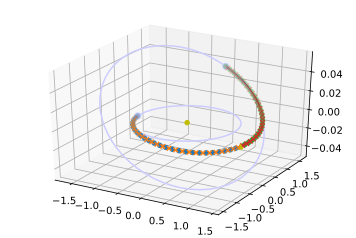

In [8]:
# plot trajectory
udp.plot_traj(pop.champion_x)

In [9]:
# trajectory data
traj = udp.get_trajectory(pop.champion_x)

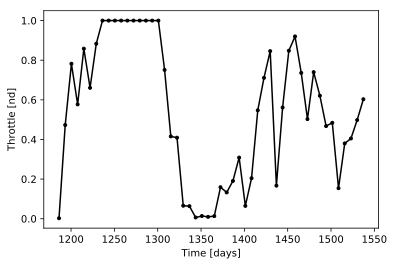

In [10]:
# plot control
plt.figure()
plt.plot(traj[:, 0], traj[:, 8], "k.-")
plt.ylabel("Throttle [nd]")
plt.xlabel("Time [days]")
plt.show()

In [11]:
# t0, T, mf
pop.champion_x[0:3]

array([ 1182.51585649,   358.3972422 ,   793.62061059])